**6장 – 결정 트리**

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 결정 트리 학습과 시각화

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

**<그림 6-1. 붓꽃 결정 트리> 생성 코드**

# 예측하기

**식 6-1: 지니 불순도**

$
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$

**식 6-3: 엔트로피 불순도**

$
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$


**식 6-2: 분류에 대한 CART 비용 함수**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
&\text{여기에서 }\begin{cases}
G_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 불순도}\\
m_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 샘플 수}
\end{cases}
\end{split}
$

**<그림 6-2. 결정 트리의 결정 경계> 생성 코드**

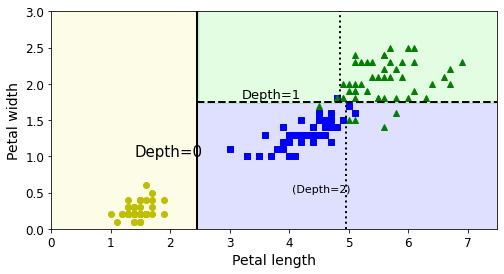

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

# 클래스 확률 추정

In [ ]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[5, 1.5]])

array([1])

# 규제 매개변수

(회전 같은) 데이터셋의 작은 변화가 매우 다른 결정 트리를 만들었습니다.
사이킷런에서 사용하는 CART 훈련 알고리즘은 확률적이기 때문에 동일한 데이터에서 같은 모델을 훈련하여 매번 매우 다른 모델을 만들 수 있습니다. 이를 확인하기 위해 `random_state`를 다른 값으로 지정해 보겠습니다:

In [ ]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=40)

**<그림 6-8. 훈련 세트의 세부사항에 민감한 결정 트리> 생성 코드**

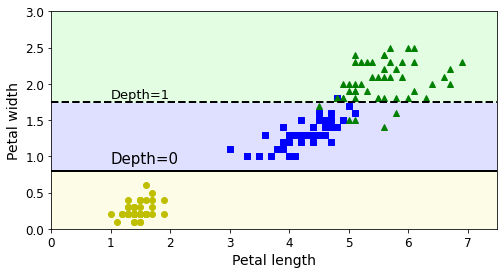

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)
plt.show()

**<그림 6-3. min_samples_leaf 매개변수를 사용한 규제> 생성 코드**

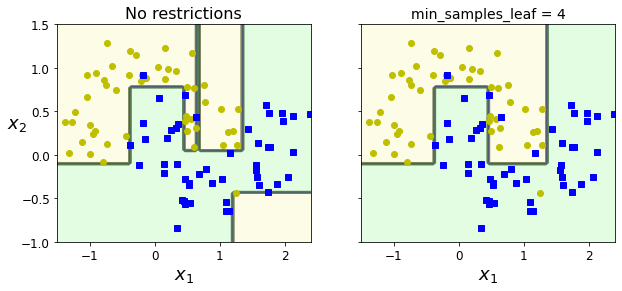

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")
plt.show()

데이터셋을 회전하면 완전히 다른 결정 경계를 만듭니다:

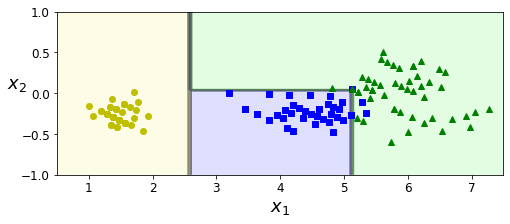

In [ ]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

**<그림 6-7. 훈련 세트의 회전에 민감한 결정 트리> 생성 코드**

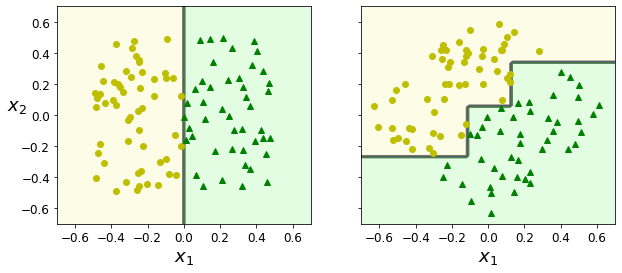

In [ ]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

# 회귀

간단한 선형 데이터셋을 준비합니다:

In [ ]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

**코드 예제:**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

**<그림 6-5. 두 개의 결정 트리 회귀 모델의 예측> 생성 코드**

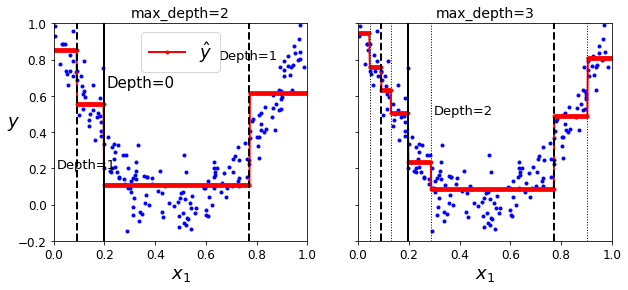

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show()

**<그림 6-6. 결정 트리 회귀 모델의 규제> 생성 코드**

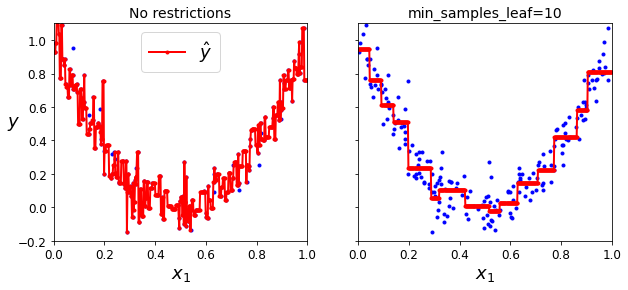

In [ ]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()

# 추가활동
* CART 알고리즘의 간단한 형태 구현
  - 데이터: 붓꽃 데이터
  - 깊이 2(최종 노드의 수 4개)
* 방법
  1. 전체 특성 4개 중 임의로 하나(k)를 고른다.
  2. 해당 특성(k)의 최대값과 최소값 사이에 50개의 값(tk)에 대해 비용함수 J(k,tk)가 최소가 되는 tk를 선택한다(깊이 1완성)
  3. 같은 방법으로 깊이 2를 완성한다.(이때 사용되었던 특성 k가 다시 사용될 수도 있다.)
  4. 모듈을 사용한 것과 성능을 비교한다.

## 데이터셋 불러오기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

## 데이터셋 특징 살펴보기

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
type(iris)
# 슬라이싱하기도 어렵고 feature_name으로 데이터를 추출하기도 어려움

sklearn.utils.Bunch

In [ ]:
import pandas as pd
# 데이터 조작을 편하게 하기 위해 데이터프레임 타입으로 변환
df_iris = pd.DataFrame(iris['data'], columns=iris.feature_names)
df_target = pd.Series(iris['target'])
# feature 변수와 target 변수를 합친 데이터프레임도 하나 만들어둠
df = df_iris.copy()
df['target'] = iris['target']

In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


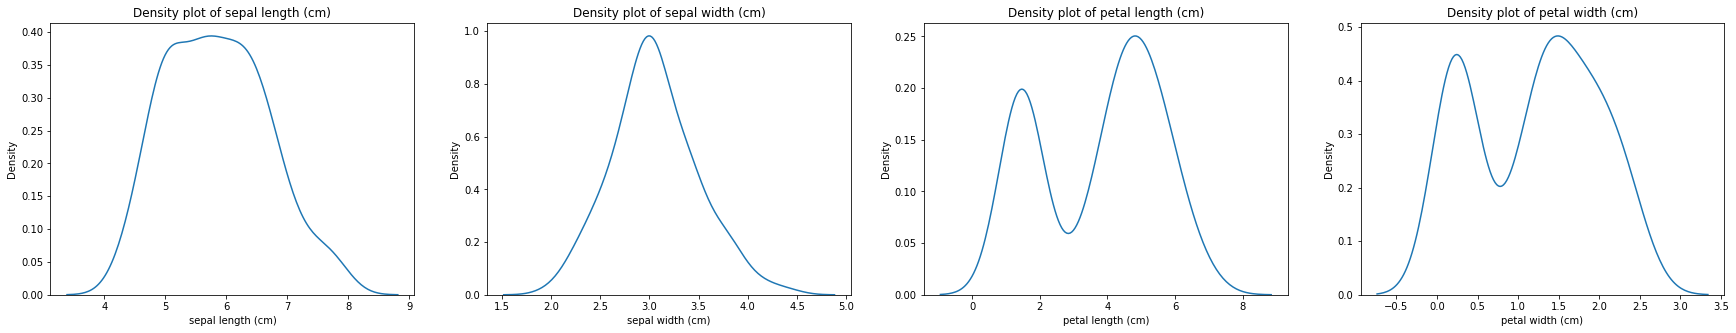

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,5))
plt.subplot(141)
sns.kdeplot(df_iris['sepal length (cm)'])
plt.title("Density plot of sepal length (cm)")

plt.subplot(142)
sns.kdeplot(df_iris['sepal width (cm)'])
plt.title("Density plot of sepal width (cm)")

plt.subplot(143)
sns.kdeplot(df_iris['petal length (cm)'])
plt.title("Density plot of petal length (cm)")

plt.subplot(144)
sns.kdeplot(df_iris['petal width (cm)'])
plt.title("Density plot of petal width (cm)")

plt.show()

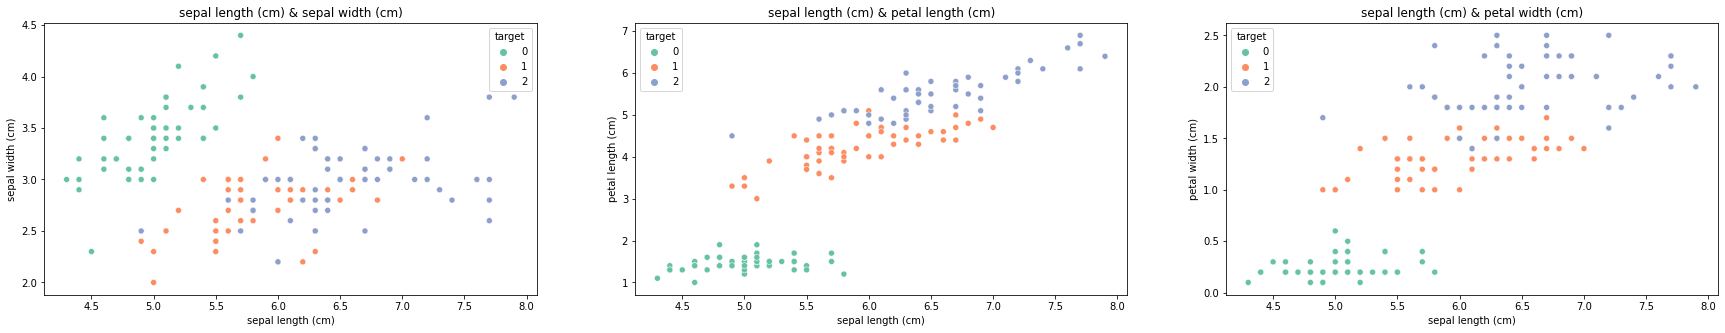

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(131)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target',data=df, palette='Set2')
plt.title("sepal length (cm) & sepal width (cm)")

plt.subplot(132)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target',data=df, palette='Set2')
plt.title("sepal length (cm) & petal length (cm)")

plt.subplot(133)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='target',data=df, palette='Set2')
plt.title("sepal length (cm) & petal width (cm)")
plt.show()

## train, test 데이터 셋 나누기

In [ ]:
X = iris['data']
y = iris['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=11)

## 사전 준비 - 필요한 기능 함수로 정의해놓기

In [ ]:
y_train
# 현재 1, 0, 2 로 분류하면 되는 문제인 것을 확인

array([1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1,
       0, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2,
       0, 1, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# 지니불순도 함수
def gini(datas):
  clf_good_target = {"target_1": 0,
                     "target_0": 0,
                     "target_2": 0} # 각 클래스에 속한 샘플의 수를 count할 변수

  for data in datas:
    if data[4] == 1:
      clf_good_target['target_1'] += 1
    elif data[4] == 0:
      clf_good_target['target_0'] += 1
    elif data[4] == 2:
      clf_good_target['target_2'] += 1
  sum = ((clf_good_target['target_1']/len(datas))**2) + ((clf_good_target['target_0']/len(datas))**2) + ((clf_good_target['target_2']/len(datas))**2)
  return 1 - sum

In [ ]:
# 왼쪽 오른쪽 노드를 분기하는 함수 정의
def setNode(datas, feature, thresholds):
  left_node = []
  right_node = []
  for data in datas:
    if data[feature] < thresholds: # 임계값보다 작다면
      left_node.append(data)
    else: # 임계값보다 크다면
      right_node.append(data)
  return left_node, right_node

In [ ]:
# 비용함수(J(k, t_k))
def loss(datas, feature, thresholds):
  left_datas, right_datas = setNode(datas, feature, thresholds)
  left_term = len(left_datas) / len(datas) * gini(left_datas)
  right_term = len(right_datas) / len(datas) * gini(right_datas)
  return left_term, right_term

## CART 훈련 알고리즘 적용
* 깊이 2의 트리를 만들어야 함
* 깊이 0에서 노드 1개, 깊이 1에서 노드 2개, 깊이 2에서 노드 4개
* 각 노드의 변수의 이름을 depth[해당 노드의 깊이]_[같은 깊이에서의 노드의 순서]
  - ex. 깊이 1에서 두 번째 노드 : depth1_2

In [ ]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [ ]:
# 4개 특성 + 정답 레이블 = 5개의 특성으로 X데이터와 y데이터를 합친 넘파이 배열을 만들 준비
n = len(X_train)
datas = np.zeros((n,5))    

# 합치는 과정
for i in range(n):
  datas[i,:4] = X_train[i]
  datas[i, 4] = y_train[i]

In [ ]:
# 잘 합쳐졌는지 확인
datas[:5]

array([[5.1, 2.5, 3. , 1.1, 1. ],
       [6.6, 2.9, 4.6, 1.3, 1. ],
       [5. , 3.2, 1.2, 0.2, 0. ],
       [7.4, 2.8, 6.1, 1.9, 2. ],
       [5.1, 3.8, 1.6, 0.2, 0. ]])

In [ ]:
# 특성들의 인덱스 확인
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 깊이 1을 구성: depth1_1, depth1_2

### 깊이 1을 구성하기 위한 실험
* 다양한 특성과 임계값으로 loss를 측정하여 가장 좋은 조합을 찾아낸다.
* 이때 left node의 loss가 가장 적은 조합을 찾는 것을 목표로 한다.

#### 실험1: petal width (cm) / 0.75

In [ ]:
# 특성은 'petal width (cm)'로 선택(3번째 인덱스값을 이용)
FEATURE, THRESHOLDS = 3, 0.75

left, right = loss(datas, FEATURE, THRESHOLDS)

In [ ]:
left, right

(0.0, 0.3279503105590062)

#### 실험2: petal length (cm) / 2.5

In [ ]:
# 특성은 'petal length (cm)'로 선택(2번째 인덱스값을 이용)
FEATURE, THRESHOLDS = 2, 2.5

left, right = loss(datas, FEATURE, THRESHOLDS)

In [ ]:
left, right

(0.0, 0.3279503105590062)

> 동일한 loss를 보였기 때문에 임의로 petal width(cm) / 0.75로 깊이 1의 노드를 구성

In [ ]:
FEATURE, THRESHOLDS = 3, 0.75
depth1_1, depth1_2 = setNode(datas, FEATURE, THRESHOLDS)

In [ ]:
# depth1_1와 depth1_2의 지니불순도를 검사
print(gini(depth1_1))
print(gini(depth1_2))

0.0
0.499054820415879


> 왼쪽 노드는 완벽하게 분리가 된 것을 확인할 수 있었다.

> 깊이 1 구성을 통한 전략 구성
* 좀전에 구성한 깊이 1을 통한 새로운 전략
  - depth2_1과 depth2_2(깊이 1에서의 왼쪽 노드를 분기했을 때의 두개의 노드)를 구성할 필요가 없어졌음
  - 깊이 1에서의 오른쪽 노드를 분기해서 depth2_3과 depth2_4를 만들어야 함

In [ ]:
# 시각화 하기 위해 데이터프레임 구성
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']
df1_2 = pd.DataFrame(depth1_2, columns=columns)

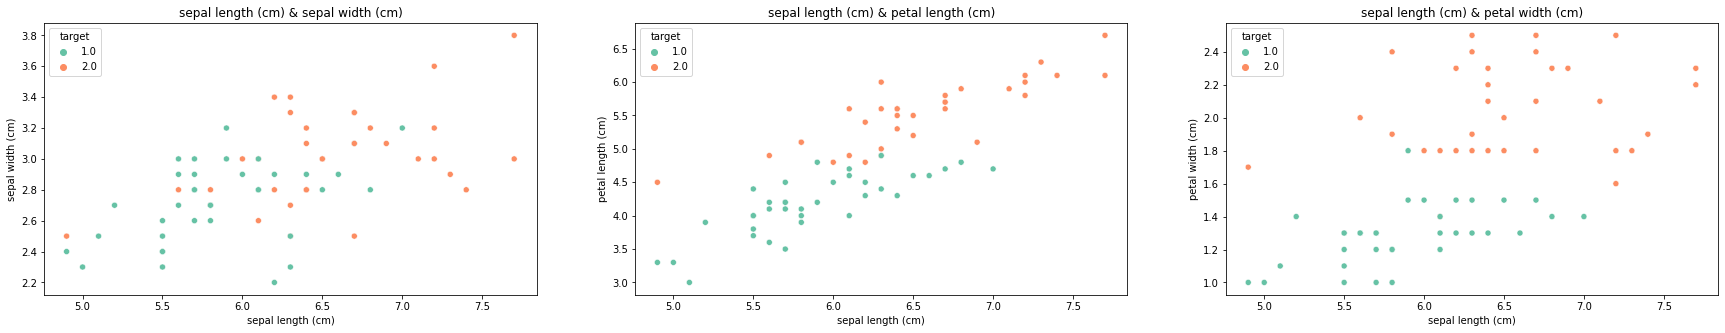

In [ ]:
plt.figure(figsize=(30, 5))
plt.subplot(131)
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target',data=df1_2, palette='Set2')
plt.title("sepal length (cm) & sepal width (cm)")

plt.subplot(132)
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', hue='target',data=df1_2, palette='Set2')
plt.title("sepal length (cm) & petal length (cm)")

plt.subplot(133)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='target',data=df1_2, palette='Set2')
plt.title("sepal length (cm) & petal width (cm)")
plt.show()

> 깊이 2에서 오른쪽 노드를 시각화했을 때 petal width(cm)를 1.5로 분기하는 것이 적절해 보임!

## 깊이 2를 구성: depth2_3, depth2_4
* petal width(cm) / 1.5

In [ ]:
# 특성은 'petal width (cm)'로 선택(3번째 인덱스값을 이용)
FEATURE, THRESHOLDS = 3, 1.5

left, right = loss(depth1_2, FEATURE, THRESHOLDS)

In [ ]:
left, right

(0.02801932367149762, 0.1664808621330361)

In [ ]:
FEATURE, THRESHOLDS = 3, 1.57

left, right = loss(depth1_2, FEATURE, THRESHOLDS)

In [ ]:
left, right

(0.028180354267310855, 0.028107158541941082)

In [ ]:
FEATURE, THRESHOLDS = 3, 1.56

left, right = loss(depth1_2, FEATURE, THRESHOLDS)

In [ ]:
left, right

(0.028180354267310855, 0.028107158541941082)

> 섬세하게 임계값을 수정을 시도해 보았지만, 1.5에서 가장 좋은 값을 보였다.

In [ ]:
# 노드 분기
FEATURE, THRESHOLDS = 3, 1.5
depth2_3, depth2_4 = setNode(depth1_2, FEATURE, THRESHOLDS)

In [ ]:
# depth1_1와 depth1_2의 지니불순도를 검사
print(gini(depth2_3))
print(gini(depth2_4))

0.06444444444444453
0.2945430637738331


## 성능 평가 - 직접 구현

In [ ]:
# Leaf node들의 지니불순도 확인
print("depth1_1: ", gini(depth1_1))
print("depth2_1: ", gini(depth2_3))
print("depth2_2: ", gini(depth2_4))

depth1_1:  0.0
depth2_1:  0.06444444444444453
depth2_2:  0.2945430637738331


In [ ]:
depth1_1[:10]

[array([5. , 3.2, 1.2, 0.2, 0. ]),
 array([5.1, 3.8, 1.6, 0.2, 0. ]),
 array([4.4, 3.2, 1.3, 0.2, 0. ]),
 array([5.4, 3.4, 1.7, 0.2, 0. ]),
 array([5.1, 3.7, 1.5, 0.4, 0. ]),
 array([5. , 3.4, 1.6, 0.4, 0. ]),
 array([5.2, 3.4, 1.4, 0.2, 0. ]),
 array([5. , 3.6, 1.4, 0.2, 0. ]),
 array([5.4, 3.4, 1.5, 0.4, 0. ]),
 array([5.1, 3.4, 1.5, 0.2, 0. ])]

In [ ]:
depth2_3[:10]

[array([5.1, 2.5, 3. , 1.1, 1. ]),
 array([6.6, 2.9, 4.6, 1.3, 1. ]),
 array([6.1, 2.6, 5.6, 1.4, 2. ]),
 array([6.1, 2.8, 4.7, 1.2, 1. ]),
 array([5.6, 3. , 4.1, 1.3, 1. ]),
 array([5.5, 2.6, 4.4, 1.2, 1. ]),
 array([5. , 2.3, 3.3, 1. , 1. ]),
 array([5.6, 2.7, 4.2, 1.3, 1. ]),
 array([6.2, 2.9, 4.3, 1.3, 1. ]),
 array([6.3, 2.3, 4.4, 1.3, 1. ])]

In [ ]:
depth2_4[:10]

[array([7.4, 2.8, 6.1, 1.9, 2. ]),
 array([6.8, 3.2, 5.9, 2.3, 2. ]),
 array([6.9, 3.1, 5.1, 2.3, 2. ]),
 array([5.9, 3. , 4.2, 1.5, 1. ]),
 array([4.9, 2.5, 4.5, 1.7, 2. ]),
 array([6.7, 3.1, 4.7, 1.5, 1. ]),
 array([6.5, 2.8, 4.6, 1.5, 1. ]),
 array([6.5, 3. , 5.5, 1.8, 2. ]),
 array([6.3, 2.5, 5. , 1.9, 2. ]),
 array([6.3, 2.7, 4.9, 1.8, 2. ])]

In [ ]:
# 테스트 세트를 통과 시키는 함수 정의
# 통과되었을 때 최종적으로 depth1_1에 도착 -> 클래스 0으로 예측
#                          depth2_3에 도착 -> 클래스 1으로 예측
#                          depth2_4에 도착 -> 클래스 2으로 예측
def forTest(X_test):

  y_pred = []

  for data in X_test:
    # 깊이 1 통과
    FEATURE, THRESHOLDS = 3, 0.75
    if data[FEATURE] <= THRESHOLDS: # 임계값을 기준으로 이보다 기준으로 작으면 깊이 1의 왼쪽 노드로 이동
      y_pred.append(0)
    else: # 임계값을 기준으로 이보다 크면 깊이 1의 오른쪽 노드로 이동
      # 깊이 2 구성
      FEATURE, THRESHOLDS = 3, 1.5
      if data[FEATURE] <= THRESHOLDS: # 임계값을 기준으로 이보다 작으면 깊이 2의 왼쪽 노드로 이동
        y_pred.append(1)
      else: # 임계값을 기준으로 이보다 크면 깊이 2의 오른쪽 노드로 이동
        y_pred.append(2)

  return y_pred

In [ ]:
y_pred = forTest(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 10,  4],
       [ 0,  2, 15]])

## 모듈 사용하여 훈련 및 예측

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=11)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=11)

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 10,  4],
       [ 0,  2, 15]])

> 직접 구현했을 때와 모듈을 사용했을 때 완전히 동일하게 아주 좋은 성능을 보였음